In [5]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"frontierskillbridge","key":"aca500af066fd382abfd99fe6b6e878c"}'}

In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
!unzip gtsrb-german-traffic-sign.zip


Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

**Load and Preprocess the GTSRB Dataset**

In [4]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

data_dir = '/content/train'
img_size = (32, 32)

X = []
y = []

for class_id in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_id)
    if not os.path.isdir(class_path):
        continue
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)
        X.append(img)
        y.append(int(class_id))

X = np.array(X).astype('float32') / 255.0
y = np.array(y)
y_cat = to_categorical(y, num_classes=43)

print("Images loaded:", X.shape)
print("Labels loaded:", y.shape)


Images loaded: (39209, 32, 32, 3)
Labels loaded: (39209,)


**Train-Validation-Test Split**

In [6]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_cat, test_size=0.3, random_state=42, stratify=y_cat)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


**Build a CNN Model**

In [7]:
from tensorflow.keras import models, layers

def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(43, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_cnn()
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,067 (1.38 MB)

 Trainable params: 361,067 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

**Train the Model**

In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                    validation_data=(X_val, y_val))



Epoch 1/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 49s 107ms/step - accuracy: 0.2444 - loss: 2.8150 - val_accuracy: 0.8454 - val_loss: 0.5672
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 81s 105ms/step - accuracy: 0.7817 - loss: 0.6952 - val_accuracy: 0.9541 - val_loss: 0.1910
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 85s 112ms/step - accuracy: 0.8924 - loss: 0.3502 - val_accuracy: 0.9684 - val_loss: 0.1156
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 79s 104ms/step - accuracy: 0.9331 - loss: 0.2278 - val_accuracy: 0.9750 - val_loss: 0.0870
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 84s 109ms/step - accuracy: 0.9504 - loss: 0.1610 - val_accuracy: 0.9888 - val_loss: 0.0490
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 81s 108ms/step - accuracy: 0.9611 - loss: 0.1273 - val_accuracy: 0.9878 - val_loss: 0.0436
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 81s 104ms/step - accuracy: 0.9677 - loss: 0.1046 - val_accuracy: 0.9891 - val_loss: 0.0373
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 82s 104ms/step - accuracy: 0.9729 - loss: 0

**Evaluate and Plot Confusion Matrix**



Test Accuracy: 0.9927
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step


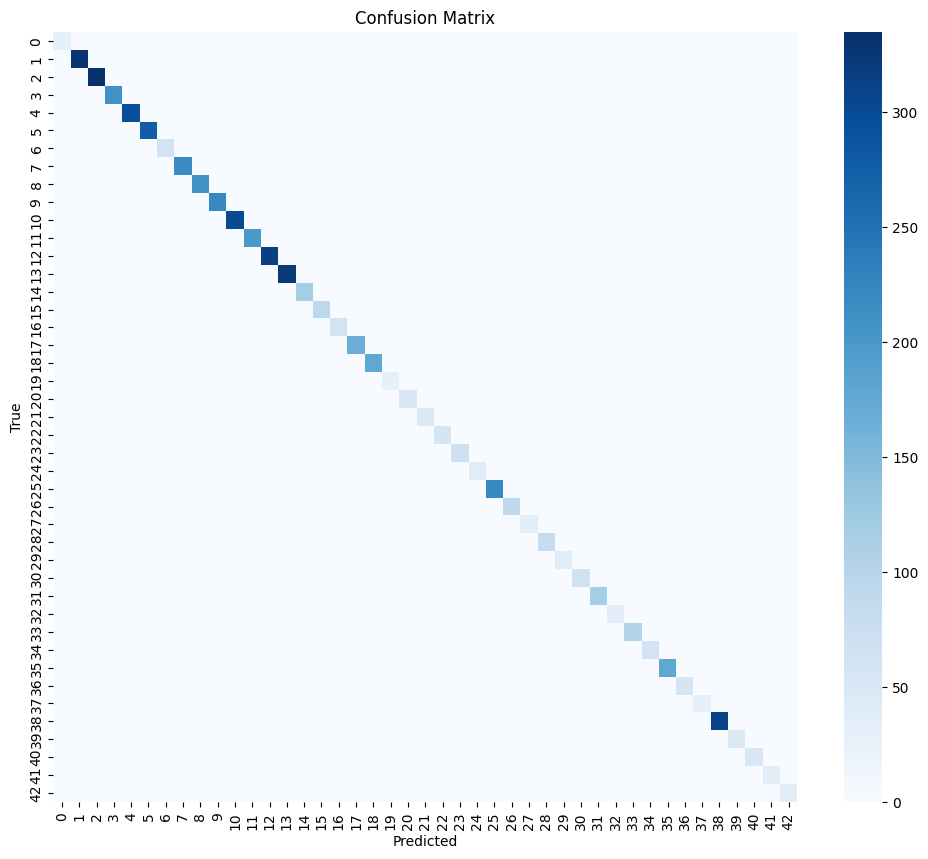

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


 **Training Curves (Accuracy & Loss Plots)**

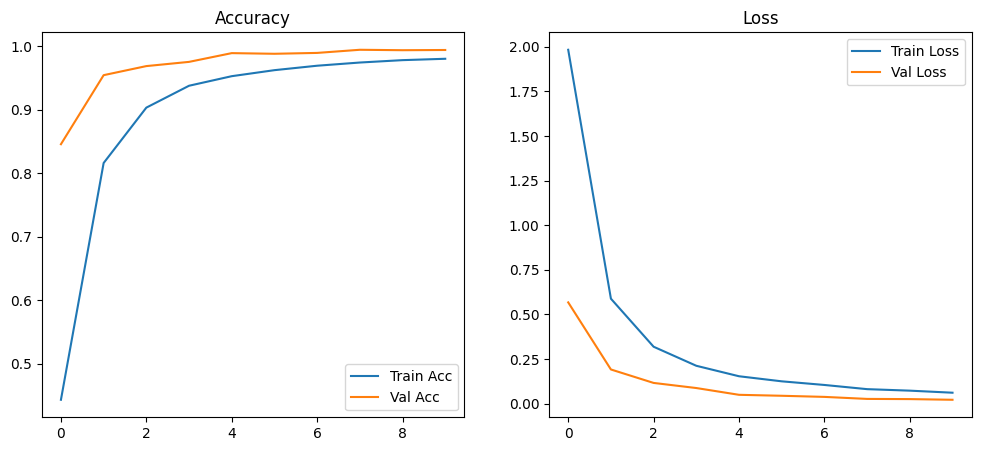

In [10]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()


**Save the Model**

In [11]:
model.save('traffic_sign_model.h5')


**Visualize Sample Predictions**


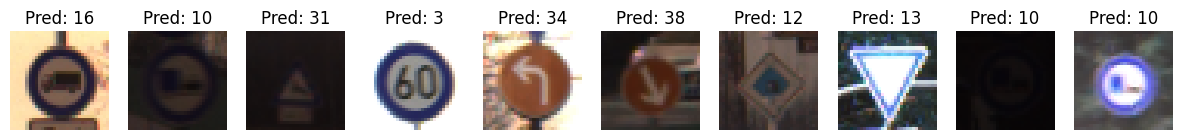

In [12]:
num_images = 10
plt.figure(figsize=(15, 3))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(X_test[i])
    plt.title(f"Pred: {y_pred_classes[i]}")
    plt.axis('off')
plt.show()

